# Tarefas

## Revisão do Foundations
Revise artigo Best Practices for Foundations in Molecular Simulations.

BRAUN, E. et al. Best Practices for Foundations in Molecular Simulations [Article v1.0]. Living Journal of Computational Molecular Science, v. 1, n. 1, p. 1–27, 2019. 

## Água, sua linda.
Pesquise e anote sobre as seis propriedades da água abaixo
1. Densidade.
2. Calor de vaporização.
3. Coeficiente de expansão térmica.
4. Compressibilidade isotérmica.
5. Calor específico isobárico.
6. Constante dielétrica.

Em sua pesquisa, foque em:
* Definições.
* Como são medidas experimentalmente.
* Como são calculadas a partir das simulações.


### Revise artigos sugeridos sobre os modelos de água para simulações de mecânica molecular.
>Anote as propriedades experimentais mensuráveis e as que são tradicionalmente usadas para validade os modelos.

Uma revisão recente foi feita pelo Onifriev, pai dos melhores modelos computacionais de água, tanto explícito (partículas), quanto implícito (via equações)

ONUFRIEV, A. V.; IZADI, S. Water models for biomolecular simulations. Wiley Interdisciplinary Reviews: Computational Molecular Science, v. 8, n. 2, p. e1347, mar. 2018. 

IZADI, S.; ONUFRIEV, A. V. Accuracy limit of rigid 3-point water models. Journal of Chemical Physics, v. 145, n. 7, 2016. 

[Dica] Consulte também o suplementar do:  
WANG, L.-P. et al. Systematic Improvement of a Classical Molecular Model of Water. The Journal of Physical Chemistry B, v. 117, n. 34, p. 9956–9972, 2013. 
Link: https://pubs.acs.org/doi/suppl/10.1021/jp403802c/suppl_file/jp403802c_si_001.pdf


### Agora que você sabe tudo sobre a água:
Sugira um conjunto de simulações e parâmetros para calcular todas as 6 propriedades.
1. Densidade, 2. Calor de vaporização., 3. Coeficiente de expansão térmica., 4. Compressibilidade isotérmica.
5. Calor específico isobárico., 6. Constante dielétrica.


# Simulações de referência.
Fizemos algumas simulações de referência para pequenas caixas d'agua visando calcular algumas de suas propriedades. Para isso, preparamos caixas de simulação simples usando o GROMACS usando os modelos SPC, SCPE, TIP3P, TIP4P, TIP4PEW, TIP5 e OPC. Com essas caixas, usamos as ferramentas do GROMACS para algumas análises.

## Análises das simulações de referência

Seguimos um protocolo simples para podemos correr rapidademente as simulações mas...

* Será que as essas simulações são adequadas para calcular essas propriedades ?
    * Caso não, proponha o experimento adequado.
* Será que os modelos são descritivos de tais propriedades ?
    * Estude as limitações de cada modelo.



## Análises realizadas
Veja o arquivo <b>TEMPLATE_ANALYSIS.SGE</b> ele contém um script de análise contendo os comandos do GROMACS, que foram executado em cada uma das pastas de simulação, gerando as seguintes análises:
* "Energéticas" - A partir do <b>prd.edr</b> extraímos:
    * Potential
    * Temperature
    * Pressão
    * Densidade
* Geométricas - A partir do <b>prd.xtc</b> (trajetória) calculamos:
    * Numero de H-bonds
    * Difusao
    * g(r) - Função de distribuição radial

### Tutorial de Apresentação dos resultados
Vamos usar este Jupyter Notebook para mostrar os resultados. 
Acompanha abaixo como analises os seus dados usando os pacotes do Python, em especial o <b>Pandas</b>, um módulo desenvolvido para facilitar o Data Analysis.

In [1]:
# Importa os módulos do Python.
import pandas as pd                    # Pandas :) 
import seaborn as sns                  # Seaborn é um pacote avançado para fazer gráficos
from matplotlib import pyplot as plt   # Biblioteca de gráficos

In [2]:
# Define o nome do arquivo. 
arquivo='/Users/dgomes/github/EMMSB_2018_DM/00.agua/spc/energy.xvg'

# Guarda o conteúdo do energy.xvg no "DataFrame" energias.
energias = pd.read_csv(arquivo,header=None,delim_whitespace=True)

# O arquivo não tem cabeçalho dizendo o que significam os dados.
# Então vamos dar um nome às colunas, na ordem certa.
energias.columns=['Time(ps)','Potential','Temperature','Pressure','Density']

# Visualizar os primeiros valores para ver como está a nossa tabela de dados. 
energias.head(5)

,Time(ps),Potential,Temperature,Pressure,Density
0,0.0,-36976.785156,296.677368,914.510193,973.783691
1,10.0,-37238.019531,296.685638,202.841553,984.031372
2,20.0,-36991.382812,295.676056,732.695984,985.921387
3,30.0,-37142.226562,296.118683,340.049316,986.786499
4,40.0,-36895.457031,297.692017,-683.848267,967.647034


In [3]:
# O DataFrame é um objeto do "Pandas", que tem funções úteis, como o "describe"
energias.describe()

,Time(ps),Potential,Temperature,Pressure,Density
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,5000.000000,-36922.825503,297.984159,24.084377,978.022444
std,2891.081113,208.517445,6.388546,444.095137,9.265339
min,0.000000,-37499.039062,277.137482,-1342.904785,949.132751
25%,2500.000000,-37069.074219,293.565643,-279.293793,971.978271
50%,5000.000000,-36922.523438,297.957458,15.940674,978.050720
75%,7500.000000,-36774.996094,302.122681,301.073303,983.974365
max,10000.000000,-36262.269531,319.320984,1376.299927,1008.807800


In [4]:
# Você pode ver propriedades de uma determinada coluna assim:
energias['Potential'].mean()

-36922.82550259438

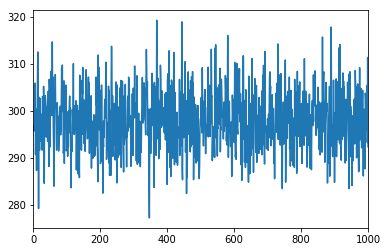

In [5]:
# Você pode facilmente plotar os resultados de uma coluna (sem se preocupar com o eixo X)
energias['Temperature'].plot()

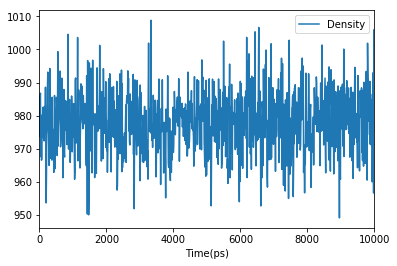

In [6]:
# Ou pode ser mais específico com os dados que quer plotar:
energias.plot(x='Time(ps)',y='Density')

In [7]:
# Você notou que o Tempo está em "ps", vamos criar uma nova coluna com o tempo em "ns"
energias['Time(ns)']=energias['Time(ps)']/1000

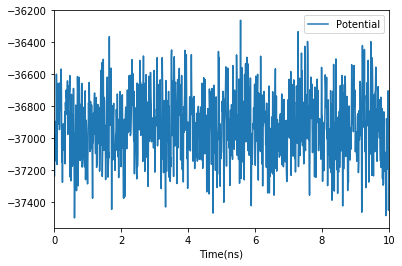

In [8]:
# Ou pode ser mais específico com os dados que quer plotar:
energias.plot(x='Time(ns)',y='Potential')

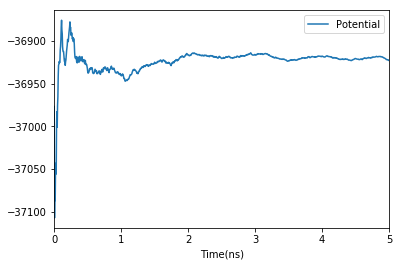

In [9]:
# Tá difícil de interpretar esse resultado. Que tal vemos o valor média ?
energias.expanding().mean().plot(x='Time(ns)',y='Potential')

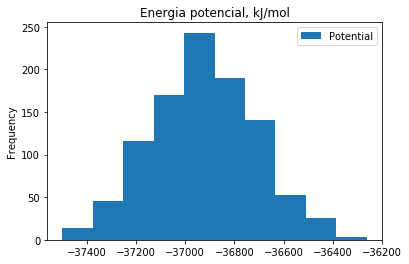

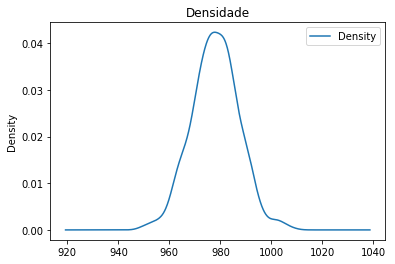

In [10]:
# Vamos explorar um pouco mais as análises, que tal um Histograma ou um gráfico de densidade?
# Alem disso vamos por um título no gráfico

energias.plot(y='Potential',kind='hist',title='Energia potencial, kJ/mol')
energias.plot(y='Density',  kind='kde', title='Densidade')

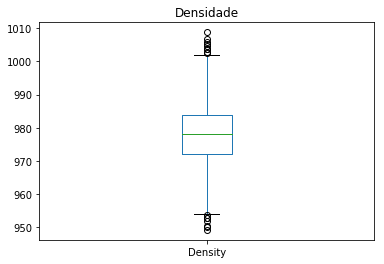

In [11]:
# Boxplot
energias.plot(y='Density',  kind='box', title='Densidade')

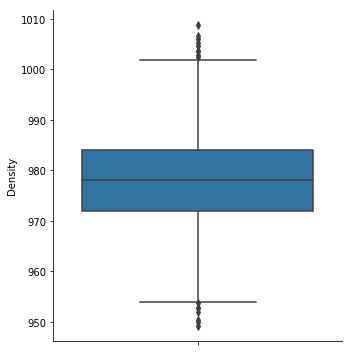

In [12]:
# O pacote Seaborn deixa tudo mais lindo
sns.catplot(data=energias,y='Density',kind='box')

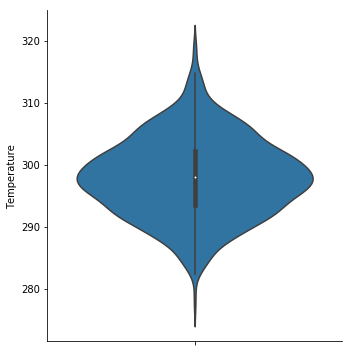

In [13]:
sns.catplot(data=energias,y='Temperature',kind='violin')

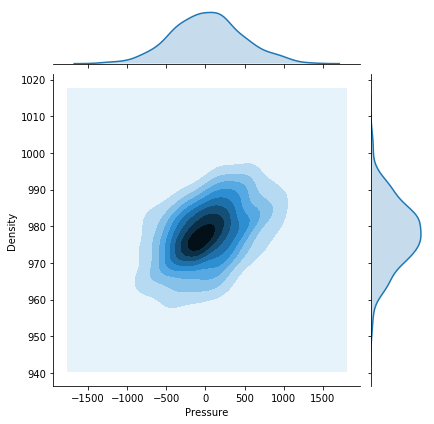

In [14]:
# Com o Seaborn é fácil ver a relação entre duas propriedades 
sns.jointplot(data=energias,x='Pressure',y='Density',kind='kde')

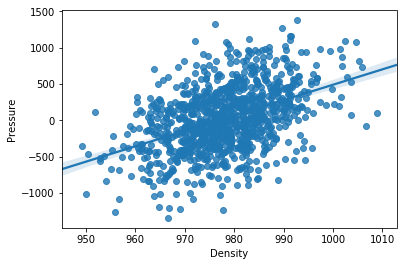

In [15]:
# Mais uma vez, vamos usar o Seaborn para a relação entre duas propriedades, agora com a regressão linear.
sns.regplot(data=energias,x='Density',y='Pressure')

## Chega de brincadeira. Vamos comparar os modelos de água
Agora vai ficar um pouco mais complicado.
Vamos ler os dados de TODAS as simulações e armazenar num único DataFrame.
Além disso vamos converter a tabela (dataframe) num formato chamdo "Tidy Data", que torna tudo mais fácil para o Seaborn.

In [16]:
# Lista de modelos de água
WATER_MODELS=['spc', 'spce', 'tip3p','tip4p', 'tip4pew', 'tip5p', 'opc']

# Cria um DataFrame vazio, que vamos encher daqui a pouco.
energias = pd.DataFrame()

# Loop para ler cada uma das simulações.
for model in WATER_MODELS :
    
    arquivo=f'/Users/dgomes/github/EMMSB_2018_DM/00.agua/{model}/energy.xvg'

    # Guarda o conteúdo do energy.xvg no "DataFrame" temporario.
    tmp = pd.read_csv(arquivo,header=None,delim_whitespace=True)

    # Poe o nome certo para as colunas
    tmp.columns=['Time(ps)','Potential','Temperature','Pressure','Density']

    # Cria uma coluna para saber que modelo é esse
    tmp['model']=model

    # Concatena no DataFrame final: energias
    energias=pd.concat([energias,tmp])

energias['Time(ns)']=energias['Time(ps)']/1000

In [17]:
# Veja como ficou o inicio (head)
energias.head()

,Time(ps),Potential,Temperature,Pressure,Density,model,Time(ns)
0,0.0,-36976.785156,296.677368,914.510193,973.783691,spc,0.00
1,10.0,-37238.019531,296.685638,202.841553,984.031372,spc,0.01
2,20.0,-36991.382812,295.676056,732.695984,985.921387,spc,0.02
3,30.0,-37142.226562,296.118683,340.049316,986.786499,spc,0.03
4,40.0,-36895.457031,297.692017,-683.848267,967.647034,spc,0.04


In [18]:
# E o fim  (tail)
energias.tail()

,Time(ps),Potential,Temperature,Pressure,Density,model,Time(ns)
996,9960.0,-46678.312500,296.622986,120.796234,984.925781,opc,9.96
997,9970.0,-47075.476562,301.455139,203.032227,1008.322754,opc,9.97
998,9980.0,-46989.441406,304.840424,-152.230957,991.432800,opc,9.98
999,9990.0,-46589.167969,293.731659,-749.876953,993.454041,opc,9.99
1000,10000.0,-46940.882812,300.118835,121.191956,1005.171936,opc,10.00


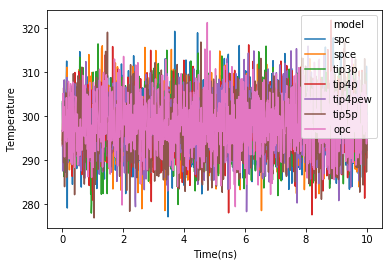

In [19]:
# Lindo, com os dados carregados podemos plotar tudo de uma vez com o SeaBorn
sns.lineplot(data=energias,x='Time(ns)',y='Temperature',hue='model')

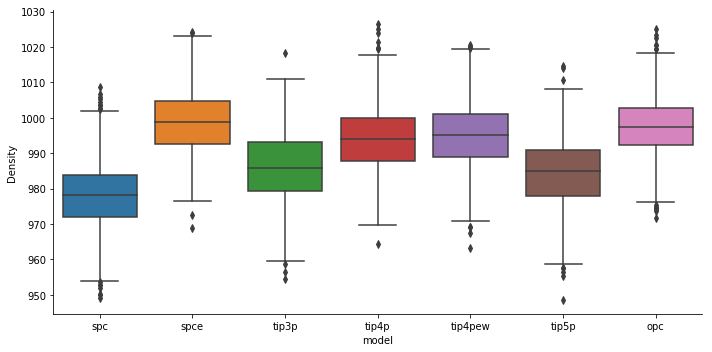

In [20]:
sns.catplot(data=energias,x='model',y='Density',kind='box',aspect=2)

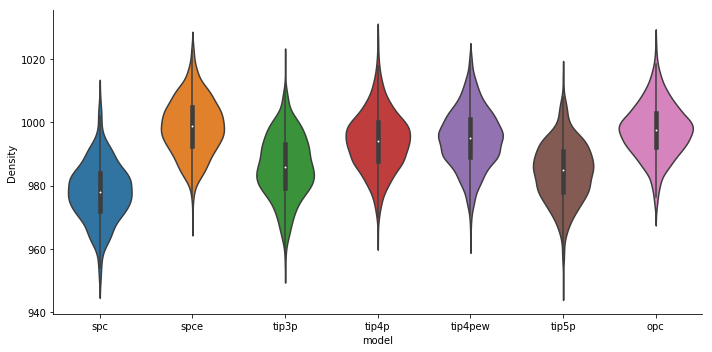

In [21]:
sns.catplot(data=energias,x='model',y='Density',kind='violin',aspect=2)

In [22]:
df = pd.read_csv('rdf_neutron.csv')

FileNotFoundError: [Errno 2] File b'rdf_neutron.csv' does not exist: b'rdf_neutron.csv'

In [ ]:
sns.lineplot(data=df,x='r',y='H2O')

In [ ]:
sns.lineplot(data=df,x='r',y='HDO')

In [ ]:
sns.lineplot(data=df,x='r',y='D2O')